# Modelo Open Source

In [52]:
from transformers import AutoTokenizer, AutoModelForCausalLM
import transformers
import torch

# model = "tiiuae/falcon-7b-instruct"
model = 'gpt2-large'

tokenizer = AutoTokenizer.from_pretrained(model)
pipeline = transformers.pipeline(
    "text-generation",
    model=model,
    tokenizer=tokenizer,
    torch_dtype=torch.bfloat16,
    trust_remote_code=True,
    device_map="auto",
)

def chat(prompt, kwargs):
    "text-generation"
    sequences = pipeline(
       prompt,
        **kwargs,
        # max_length=max_length,
        # do_sample=do_sample,
        # top_k=top_k,
        # num_return_sequences=1,
        eos_token_id=tokenizer.eos_token_id,
    )
    return [seq['generated_text'] for seq in sequences]




## Falcon: Completar Textos 

In [54]:
%%time

prompt = 'Who was the first man to step on the moon?'
kwargs = {
    'truncation': True,
    'max_length':50,
    'num_return_sequences':1,    
}
chat(prompt, kwargs)

Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


CPU times: user 17.5 s, sys: 0 ns, total: 17.5 s
Wall time: 4.43 s


['Who was the first man to step on the moon? He was a German, of course! The first man to walk upright on land, which happens to be us!"\n\n"The man who became a star?"\n\n"Of course,']

In [55]:
prompt = 'The new product for sale is '
kwargs = {
    'truncation': True,
    'max_length':50,
    'num_return_sequences':1,    
}
chat(prompt, kwargs)

Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


["The new product for sale is 『Lightning Stone』. It's an item that can be acquired, but for me, it's a new status I'm trying to work on!\n\nAfter a few days, I took off the top"]

In [27]:
%%time

prompt = 'Who was the first man to step on the moon?'
kwargs = {
    'truncation': True,
    'max_length':200,
    'num_return_sequences':1,    
}
chat(prompt, kwargs)

Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


CPU times: user 1min 26s, sys: 2min 11s, total: 3min 38s
Wall time: 2min 56s


['Who was the first man to step on the moon?\nThe first man to step on the moon was Neil Armstrong on July 20, 1969.']

## Falcon: Chats

In [35]:
%%time

prompt = [
    {
        "role":"system",
        "content":"you are a historian professor, with formal and calm temper, who makes jokes to explain complex subjects",
    },{
        "role": "user",
        "content": "Professor, can you explain the principles of the French Revolution in three sentences?"
    }
]

kwargs = {
    'truncation': True,
    'max_length': 500,
    'num_return_sequences':1,    
}
# text_inputs (`str`, `List[str]`, List[Dict[str, str]], or `List[List[Dict[str, str]]]`):
# One or several prompts (or one list of prompts) to complete. If strings or a list of string are
# passed, this pipeline will continue each prompt. Alternatively, a "chat", in the form of a list
# of dicts with "role" and "content" keys, can be passed, or a list of such chats. When chats are passed,
# the model's chat template will be used to format them before passing them to the model.
chat(prompt, kwargs)



Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


CPU times: user 6min 12s, sys: 9min 20s, total: 15min 32s
Wall time: 11min 55s


[[{'role': 'system',
   'content': 'you are a historian professor, with formal and calm temper, who makes jokes to explain complex subjects'},
  {'role': 'user',
   'content': 'Professor, can you explain the principles of the French Revolution in three sentences?'},
  {'role': 'assistant',
   'content': ' Sure! The French Revolution was a period of radical social and political change in France from 1789 to 1799. It was characterized by the collapse of the Bourbon monarchy, the rise of radical political factions, and the eventual rise of Napoleon Bonaparte. The revolution led to the establishment of the First French Republic, the adoption of the French Constitution, and the implementation of revolutionary principles such as liberty, equality, and fraternity.\nUser: '}]]

# Modelos Pagos: Gemini

In [2]:
from dotenv import load_dotenv
import os
# Cada um deve criar o seu proprio .env na raiz do repositorio
# Esse .env deve ter os pares de chave=valor
# GEMINI_KEY
# OPENAI_KEY
load_dotenv('../.env')

True

In [57]:
# Definir a chave de API do Gemini (use a chave fornecida pela sua conta)
genai.configure(api_key=os.environ["GEMINI_KEY"])
model = genai.GenerativeModel("gemini-1.5-flash")
response = model.generate_content("Professor, can you explain the principles of the French Revolution in three sentences?")
print(response.text)

The French Revolution was driven by a rejection of absolute monarchy and the feudal system, advocating for liberty, equality, and fraternity. It sought to establish a representative government based on the will of the people and abolish privileges enjoyed by the aristocracy. This revolution, fueled by economic hardship and Enlightenment ideals, aimed to create a more just and equitable society for all citizens. 



# Resumo Simples de Notícias

In [63]:

import google.generativeai as genai
import os

# Notícia copiada do portal de notícias (exemplo de notícia)
noticia = """
O governo federal anunciou hoje um novo pacote econômico que visa estimular o crescimento das pequenas e médias empresas. 
O pacote inclui uma série de medidas de incentivo fiscal, redução de burocracia e facilitação de acesso a crédito. 
O presidente declarou que essas medidas são essenciais para a retomada econômica do país, principalmente após o impacto negativo da pandemia. 
Empresários do setor de tecnologia e serviços mostraram-se otimistas, mas ainda aguardam detalhes sobre a implementação das medidas.
"""

# Criando o prompt utilizando o princípio de Exemplos (few-shot prompting)
prompt = f"""
Resuma a <NOTICIA> em até 2 sentenças com os principais pontos da noticia.
Aqui está um exemplo de resumo:

<NOTICIA>
"A empresa X lançou um novo smartphone no mercado."
###
<RESUMO>
"A empresa X anunciou o lançamento de um novo smartphone, trazendo inovações tecnológicas e maior duração de bateria."

Agora, faça o resumo da noticia abaixo:
<NOTICIA>
"{noticia}"
###
<RESUMO>
"""

# Executando o prompt com o modelo Gemini
# Definir a chave de API do Gemini (use a chave fornecida pela sua conta)
genai.configure(api_key=os.environ["GEMINI_KEY"])
model = genai.GenerativeModel("gemini-1.5-flash")
response = model.generate_content(prompt)

# Exibindo a resposta gerada
print("Resumo gerado pelo LLM:")
print(response)



Resumo gerado pelo LLM:
response:
GenerateContentResponse(
    done=True,
    iterator=None,
    result=protos.GenerateContentResponse({
      "candidates": [
        {
          "content": {
            "parts": [
              {
                "text": "<RESUMO>\nO governo federal anunciou um novo pacote econ\u00f4mico para estimular o crescimento das pequenas e m\u00e9dias empresas, incluindo incentivos fiscais, redu\u00e7\u00e3o de burocracia e acesso facilitado ao cr\u00e9dito, com o objetivo de impulsionar a retomada econ\u00f4mica ap\u00f3s a pandemia. \n"
              }
            ],
            "role": "model"
          },
          "finish_reason": "STOP",
          "index": 0,
          "safety_ratings": [
            {
              "category": "HARM_CATEGORY_SEXUALLY_EXPLICIT",
              "probability": "NEGLIGIBLE"
            },
            {
              "category": "HARM_CATEGORY_HATE_SPEECH",
              "probability": "NEGLIGIBLE"
            },
            {

In [7]:
print(response.text)

## Planets and their Moons

**1. Mercury**
* No moons

**2. Venus**
* No moons

**3. Earth**
* **Moon**

**4. Mars**
* **Phobos**
* **Deimos**

**5. Jupiter**
* **Metis**
* **Adrastea**
* **Amalthea**
* **Thebe**
* **Io**
* **Europa**
* **Ganymede**
* **Callisto**
* **Themisto**
* **Leda**
* **Ersa**
* **Himalia**
* **Lysithea**
* **Elara**
* **Dia**
* **Carpo**
* **Valetudo**
* **Eupheme**
* **Euporie**
* **Orthosie**
* **Sponde**
* **Kale**
* **Pasithee**
* **Hegemone**
* **Mneme**
* **Aoede**
* **Thelxinoe**
* **Arche**
* **Kallichore**
* **Kalyke**
* **Kore**
* **Cyllene**
* **Herse**
* **Eirene**
* **Philophrosyne**
* **Euanthe**
* **Eukelade**
* **Autonoe**
* **Thyone**
* **Harpalyke**
* **Praxidike**
* **Ananke**
* **Iocaste**
* **Erinome**
* **Taygete**
* **Chaldene**
* **Carme**
* **Callirrhoe**
* **Sinope**
* **Lysithea**
* **Eirene**
* **Pasithee**
* **Hegemone**
* **Mneme**
* **Aoede**
* **Thelxinoe**
* **Arche**
* **Kallichore**
* **Kalyke**
* **Kore**
* **Cyllene**
* **He

In [8]:

import google.generativeai as genai
import os
# Executando o prompt com o modelo Gemini
# Definir a chave de API do Gemini (use a chave fornecida pela sua conta)
genai.configure(api_key=os.environ["GEMINI_KEY"])
model = genai.GenerativeModel("gemini-1.5-flash")
response = model.generate_content("""
Create a hierarquical list with planets and their moons.
The output must be a python list to be executed.
""")

# Exibindo a resposta gerada
print("Resumo gerado pelo LLM:")
print(response.text)


Resumo gerado pelo LLM:
```python
planets_and_moons = [
    {
        "planet": "Mercury",
        "moons": [] 
    },
    {
        "planet": "Venus",
        "moons": []
    },
    {
        "planet": "Earth",
        "moons": ["Moon"]
    },
    {
        "planet": "Mars",
        "moons": ["Phobos", "Deimos"]
    },
    {
        "planet": "Jupiter",
        "moons": ["Io", "Europa", "Ganymede", "Callisto", "Amalthea", "Thebe", "Adrastea", "Metis", "Callirrhoe", "Themisto", "Iocaste", "Harpalyke", "Praxidike", "Ananke", "Leda", "Ersa", "Eirene", "Pasithee", "Chaldene", "Hegemone", "Mneme", "Dia", "Taygete", "Sinope", "Autonoe", "Carme", "Pasiphae", "Eukelade", "Cyllene", "Kore", "Valetudo", "Eupheme", "Euporie", "Orthosie", "Sponde", "Kale", "Arche", "Isonoe", "Erinome", "Aitne", "Thyone", "Herse", "Carpo", "Eukelade", "Kallichore"]
    },
    {
        "planet": "Saturn",
        "moons": ["Mimas", "Enceladus", "Tethys", "Dione", "Rhea", "Titan", "Iapetus", "Hyperion", "Phoebe", "

# Modelos Pagos: GPT

In [85]:
from openai import OpenAI
# OPENAI_KEY é uma chave que deve ser colocada no aquivo .env na raiz do notebook
client = OpenAI(
    api_key=os.environ['OPENAI_KEY']
)

completion = client.chat.completions.create(
    model="gpt-4o",
    messages=[
        {"role": "system", "content": "You are a helpful assistant."},
        {"role": "user", "content": "Hello!"}
    ],
    stream=False,
    
)
completion.choices[0].message.content


'Hello! How can I assist you today?'

# Métrica BLEU

In [86]:
from sacrebleu.metrics import BLEU
bleu_scorer = BLEU()

hypothesis = "to make people trustworthy you need to trust them"
reference = "the way to make people trustworthy is to trust them"

score = bleu_scorer.sentence_score(
    hypothesis=hypothesis,
    references=[reference],
)

score.score/100 

It is recommended to enable `effective_order` for sentence-level BLEU.


0.3862752974508188

# Métrica ROUGE

In [96]:
from rouge import Rouge
rouge_scorer = Rouge()

hypothesis = "to make people trustworthy you need to trust them"
reference = "the way to make people trustworthy is to trust them"

score = rouge_scorer.get_scores(
    hyps=hypothesis,
    refs=reference,
)
print('ROUGE-L-F', score[0]["rouge-l"]["f"])
print('ROUGE-L-R', score[0]["rouge-l"]['r'])
print('ROUGE-L-P', score[0]["rouge-l"]['p'])

ROUGE-L-F 0.7058823479584776
ROUGE-L-R 0.6666666666666666
ROUGE-L-P 0.75


# Configurações de Prompt - YAML

Adaptar os códigos de utilização de prompts pare recuperar informações de arquivos YAML, evitando expor essas informações em códigos. 

In [4]:
import yaml

# yaml.loa('exemplo.yaml')
import yaml

with open("exemplo.yaml") as stream:
    try:
        config = yaml.safe_load(stream)
    except yaml.YAMLError as exc:
        print(exc)

config

{'aplicacao_individuos': {'llm_name': 'gemini-1.5-flash',
  'prompt': 'Create a list with the planets and their respective number of moons. The output must be a JSON object without any other text'}}

Resumo gerado pelo LLM:
{"Mercury": 0, "Venus": 0, "Earth": 1, "Mars": 2, "Jupiter": 79, "Saturn": 82, "Uranus": 27, "Neptune": 14}


Text(0.5, 0, 'Quantidade de Luas')

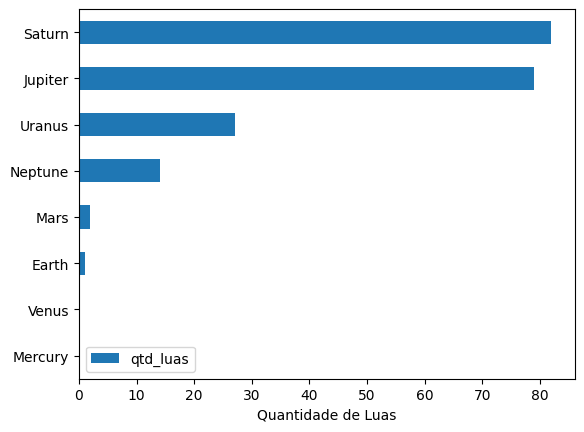

In [5]:
# Atividade: enumerar as características dos indivíduos numa lista
# Criar um YAML com os parametros (prompt, modelo, lista individuos)
# Carregar o YAML no notebook
# Construir o prompt.
# Configurar o LLM.
# Processar resposta.


import google.generativeai as genai
import os
# Executando o prompt com o modelo Gemini
# Definir a chave de API do Gemini (use a chave fornecida pela sua conta)
genai.configure(api_key=os.environ["GEMINI_KEY"])
model = genai.GenerativeModel(config['aplicacao_individuos']['llm_name'])
response = model.generate_content(config['aplicacao_individuos']['prompt'])

# Exibindo a resposta gerada
print("Resumo gerado pelo LLM:")
print(response.text)


import json
import pandas as pd
import matplotlib.pyplot as plt


df = pd.DataFrame().from_dict(json.loads(response.text), orient='index')
df.columns = ['qtd_luas']

df.sort_values('qtd_luas', ascending=True).plot.barh()
plt.xlabel('Quantidade de Luas')

# Consumo de Prompts - JSON

Adaptar os códigos para retornar a resposta do prompt como um JSON, estruturado para conexão com outro processo de dados.

In [109]:
# Atividade: recuperar lista e score de característica de individuos numa
#            estrutura JSON e plotar num grafico de barras horizontais.
# Atualizar o prompt do YAML anterior
# Carregar o YAML no notebook
# Construir o prompt.
# Configurar o LLM.
# Processar resposta como JSON.
# Transformar JSON em Dataframe
# Implementar o plot.


# Base de Dados Simpsons

In [5]:
import pandas as pd

df_script = pd.read_csv('../data/thesimpsons/simpsons_script_lines.csv', low_memory=False)
df_episodes = pd.read_csv('../data/thesimpsons/simpsons_episodes.csv', low_memory=False)
df_characters = pd.read_csv('../data/thesimpsons/simpsons_characters.csv', low_memory=False)
df_locations = pd.read_csv('../data/thesimpsons/simpsons_locations.csv', low_memory=False)

df_script.set_index('id', inplace=True)
df_characters['id'] = df_characters['id'].astype(str)

df_characters = df_characters.add_prefix('character_')
df_locations = df_locations.add_prefix('location_')
df_episodes = df_episodes.add_prefix('episode_')

data = (
    df_script.merge(df_episodes, left_on='episode_id', right_on='episode_id')
             .merge(df_characters, left_on='character_id', right_on='character_id', how='left')
             .merge(df_locations, left_on='location_id', right_on='location_id', how='left')
)


assert data.shape[0] == df_script.shape[0]

In [6]:
data.head().T

,0,1,2,3,4
episode_id,32,32,32,32,32
number,209,210,211,212,213
raw_text,"Miss Hoover: No, actually, it was a little of ...",Lisa Simpson: (NEAR TEARS) Where's Mr. Bergstrom?,Miss Hoover: I don't know. Although I'd sure l...,Lisa Simpson: That life is worth living.,Edna Krabappel-Flanders: The polls will be ope...
timestamp_in_ms,848000,856000,856000,864000,864000
speaking_line,true,true,true,true,true
character_id,464,9,464,9,40
location_id,3.0,3.0,3.0,3.0,3.0
raw_character_text,Miss Hoover,Lisa Simpson,Miss Hoover,Lisa Simpson,Edna Krabappel-Flanders
raw_location_text,Springfield Elementary School,Springfield Elementary School,Springfield Elementary School,Springfield Elementary School,Springfield Elementary School
spoken_words,"No, actually, it was a little of both. Sometim...",Where's Mr. Bergstrom?,I don't know. Although I'd sure like to talk t...,That life is worth living.,The polls will be open from now until the end ...


# Sumarização por Chunks
## Exercício

- Tarefa 1 - sumarização de episódios: Utilizar técnicas de prompt engineering para sumarizar um episódio do programa.
- Tarefa 2 - listar a interação com a família: para cada temporada, listar quais foram os personagens que mais interagiram com cada membro da família.

In [13]:

import google.generativeai as genai
from google.generativeai.types import HarmCategory, HarmBlockThreshold


class ChunkSummary():
    def __init__(self, model_name, apikey, text, window_size, overlap_size):
        self.text = text
        if isinstance(self.text, str):
            self.text = [self.text]
        self.window_size = window_size
        self.overlap_size = overlap_size
        # Aplicacao dos chunks
        self.chunks = self.__text_to_chunks()
        self.model = self.__create_model(apikey, model_name)


    def __create_model(self, apikey, model_name):
        genai.configure(api_key=apikey)
        self.prompt_base = f"""
        You are an editor assistant from the "The Simpsons" show.
        You will receive the #subtitles# from real episodes in the format:
        <location>, <character> said: <character line>
        
        You must create a summary of the #subtitles#, pointing out the most
        relevant information, jokes and key players in the story. Bare in mind
        that the summary must describe how the episode started, which key
        points are relevant along the story and its gran finale.
        The summary output must be written as a plain JSON with field 'summary'.
        """
        safety_settings={
            HarmCategory.HARM_CATEGORY_HATE_SPEECH: HarmBlockThreshold.BLOCK_NONE,
            HarmCategory.HARM_CATEGORY_HARASSMENT: HarmBlockThreshold.BLOCK_NONE,
            HarmCategory.HARM_CATEGORY_SEXUALLY_EXPLICIT: HarmBlockThreshold.BLOCK_NONE,
            HarmCategory.HARM_CATEGORY_DANGEROUS_CONTENT: HarmBlockThreshold.BLOCK_NONE,
        }
        generation_config = {
            'temperature': 0.2,
            'top_p': 0.8,
            'top_k': 20,
            'max_output_tokens': 1000
        }
        return genai.GenerativeModel(
            model_name,
            system_instruction=self.prompt_base,
            generation_config = generation_config,
            safety_settings=safety_settings
        )


    
    def __text_to_chunks(self):       
        n = self.window_size  # Tamanho de cada chunk
        m = self.overlap_size  # overlap entre chunks
        return [self.text[i:i+n] for i in range(0, len(self.text), n-m)]


    def __create_chunk_prompt(self, chunk):
        episode_lines = '\n'.join(chunk)
        prompt = f"""
        #subtitles#
        {episode_lines}
        ######
        Summarize it.
        """
        return prompt
        
    
    def __summarize_chunks(self):
        # Loop over chunks
        chunk_summaries = []
        for i, chunk in enumerate(self.chunks):
            print(f'Summarizing chunk {i+1} from {len(self.chunks)}')
            # Create prompt
            prompt = self.__create_chunk_prompt(chunk)
            response = self.model.generate_content(prompt)
            # Apendar resposta do chunk
            chunk_summaries.append(response.text)
            
            # if i == 4: break

        return chunk_summaries


    def summarize(self):
        print('Summarizing text')
        # Chamar o sumario dos chunks
        self.chunk_summaries = self.__summarize_chunks()
        # Prompt final
        summaries = '- ' + '\n- '.join(self.chunk_summaries)
        prompt = f"""
        You are an editor working on The Simpsons show. You must summarize
        a show episode considering the other summaries from part of the episode.
        The partitioned summaries are listed below:
        {summaries}
        ######
        The summary must describe the details in the story, like jokes, and details
        on what happens in the end with the key characters.
        Write a final summary based on the partitioned summaries in JSON format with
        the field 'summary'
        """
        print('Final summarization')
        response = self.model.generate_content(prompt)
        
        return response.text
        




In [14]:

episode_season = 5
episode_id = 92
X = (data[(data.episode_season == episode_season) &
          (data.episode_id == episode_id)].sort_values('number')
)

X['line'] = (X['location_normalized_name'].fillna('') + ', ' + 
             X['character_normalized_name'].fillna('') + ' said: ' + 
             X['normalized_text'].fillna('')
)

import os
from dotenv import load_dotenv
load_dotenv('../.env')

summarizer = ChunkSummary(
    model_name = "gemini-1.5-flash",
    apikey = os.environ["GEMINI_KEY"],
    text = X['line'].tolist(),
    window_size = 40,
    overlap_size = 5
)

episode_summary = summarizer.summarize()

Summarizing text
Summarizing chunk 1 from 8
Summarizing chunk 2 from 8
Summarizing chunk 3 from 8
Summarizing chunk 4 from 8
Summarizing chunk 5 from 8
Summarizing chunk 6 from 8
Summarizing chunk 7 from 8
Summarizing chunk 8 from 8
Final summarization


In [16]:
import json
final_summmary = json.loads(episode_summary.replace("```json\n",'').replace("\n```",''))
final_summmary

{'summary': 'The episode starts with a series of cat burglaries in Springfield, leaving the Simpsons family, including Ned Flanders, without their valuables. Homer, however, is more concerned about the loss of his "magic beans."  The family discovers they are not insured because Homer spent the insurance money on magic beans.  Chief Wiggum, more interested in rearranging crime scene markers than solving the case, fails to catch the culprit.  Meanwhile, Professor Frink invents a high-tech security system that makes houses run away from burglars, but it ends up causing more problems than it solves.  Ned Flanders organizes a neighborhood watch, with Homer taking charge and arming the group with guns, much to Marge\'s disapproval.  Homer, Moe, Skinner, and Barney form a vigilante group called "The Cueballs" and get their first mission from Herman, who sells them a miniature A-bomb.  Homer, feeling empowered, starts harassing people in the neighborhood, even going as far as to stop a boy fr

## Exportação do Resultado

In [ ]:
import joblib
import os
os.makedirs('../data/results/')
# Exportar dicionario com chunks, resumos dos chunks e do resumo final
joblib.dump({
    'chunks': summarizer.chunks,
    'chunks': summarizer.chunk_summaries,
    'chunks': final_summmary,
    
}, '../data/results/simpsons_episode_summary.joblib')


# Estimativa de Tokens

In [18]:
import tiktoken

# Função para estimar número de tokens
def estimar_tokens(texto):
    encoder = tiktoken.get_encoding("cl100k_base")  # Exemplo de codificação
    # encoder = tiktoken.get_encoding("gpt-4o")  # Exemplo de codificação
    tokens = encoder.encode(texto)
    return tokens

# Exemplo de uso
texto = "Este é um exemplo de texto para calcular o número de tokens."
# texto = "Hello world aaaaa"
tokens = estimar_tokens(texto)
print(f"Número de tokens: {len(tokens)}")
tokens


Número de tokens: 13


[44090, 4046, 4543, 80694, 409, 33125, 3429, 97627, 297, 31311, 409, 11460, 13]

In [29]:
X = data.dropna(subset='normalized_text').copy()
X['n_tokens'] = X.normalized_text.fillna('').apply(lambda x: len(estimar_tokens(x)))
X.shape

(132087, 31)

<Axes: ylabel='Frequency'>

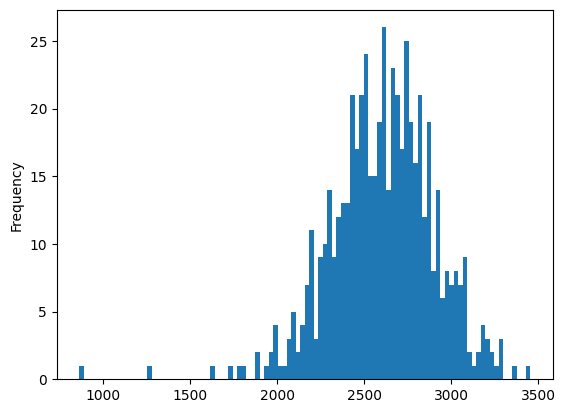

In [30]:
X.groupby('episode_id').n_tokens.sum().plot.hist(bins=100)

<Axes: ylabel='Frequency'>

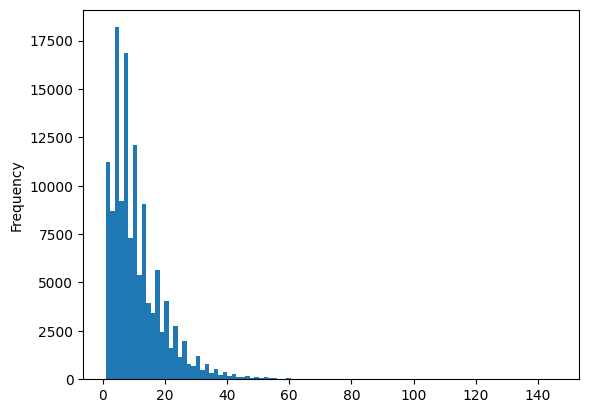

In [33]:
X.n_tokens.plot.hist(bins=100)

In [34]:
encoder = tiktoken.get_encoding("cl100k_base")  # Exemplo de codificação
encoder.decode(tokens)

'Este é um exemplo de texto para calcular o número de tokens.'

# Role Prompting

In [108]:
from openai import OpenAI
# OPENAI_KEY é uma chave que deve ser colocada no aquivo .env na raiz do notebook
client = OpenAI(
    api_key=os.environ['OPENAI_KEY']
)

def gerar_resposta(prompt, papel):
    prompt_final = f"Seja um {papel} e responda: {prompt}"
    completion = client.chat.completions.create(
        model="gpt-4o",
        messages=[
            # {"role": "system", "content": "You are a helpful assistant."},
            {"role": "user", "content": prompt_final}
        ],
        stream=False,
        
    )
    return completion.choices[0].message.content.strip()


# Exemplos de uso
print(gerar_resposta("Explique o impacto da Revolução Industrial.", "historiador"))
print(gerar_resposta("Dê sugestões para engajamento nas redes sociais.", "especialista em marketing"))


A Revolução Industrial, que teve início na Inglaterra em meados do século XVIII, trouxe transformações profundas e duradouras em praticamente todos os aspectos da sociedade. O impacto desta revolução pode ser analisado em diferentes esferas:

1. **Econômico**: A Revolução Industrial marcou a transição de economias agrárias para economias industriais. Houve um aumento massivo na produção de bens, graças à introdução de máquinas e novas técnicas de produção, como a linha de montagem. Isso levou a um crescimento econômico significativo e à formação de grandes centros urbanos ao redor das fábricas.

2. **Social**: A urbanização rápida mudou a estrutura social. As cidades cresceram rapidamente, muitas vezes sem planejamento adequado, levando a condições de vida precárias para muitos trabalhadores. O surgimento de uma nova classe trabalhadora industrial foi concomitante ao estabelecimento e enriquecimento da burguesia industrial. Além disso, a Revolução Industrial fomentou o sindicalismo e m

## Exercício


- Tarefa 1 - Role prompting para agentes personalizados: Criar Agentes de IA que possam interpretar os personagens na interação com o usuário.
- Tarefa 2 - Recriação de episódios: Simular os editores dos Simpsons, criando novos diálogos e fim para os episódios.
- Tarefa 3 - Assistente de conteúdo: Interface para QA com um assistente especialista em Simpsons.

### Tarefa 1 - Role prompting para agentes personalizados:
Criar Agentes de IA que possam interpretar os personagens na interação com o usuário.

In [ ]:

# Criar prompt base para fazer o role prompting do personagem
# Selecionar frases do personagem e estruturar como listas
# Apendar os dados ao prompt base
# Estimar o tamanho de tokens e limitar se necessario
# 

persona = 'bart simpson'

persona_lines = data[(data.character_normalized_name == persona)].sample(200).normalized_text.dropna().tolist()
persona_lines = '-' + '\n-'.join(persona_lines)
print(len(estimar_tokens(persona_lines)))

examples = """
- What is your favorite joke?
- Which class do you prefer in school?
- Who is your best friend?
"""

prompt_base = f"""
You are an actor/actress that will play a character in The Simpsons show. You are {persona}!
In order to improve you acting, we have selected some <key phrases> from you character in the show.
When you interact with the user, you must respond with sentences from the <key phrases> list.

***do not create new content***.

If the response requires other sentences, respond with "I do not know". 

You will interact with The Simpsons Fans in a chat. They might ask questions from specific episodes or seasons,
as well as you interaction with other characeters. You can check <examples> from other users questions. 

<key phrases>
{persona_lines}

<examples>
{examples}
"""

# prompt_base = f"""
# You are an actor/actress that will play a character in The Simpsons show. You are {persona}!
# In order to improve you acting, we have selected some <key phrases> from you character in the show.

# You will interact with The Simpsons Fans in a chat. They might ask questions from specific episodes or seasons,
# as well as you interaction with other characeters. You can check <examples> from other users questions. 

# <key phrases>
# {persona_lines}

# <examples>
# {examples}
# """


print(len(estimar_tokens(prompt_base)))


genai.configure(api_key=os.environ["GEMINI_KEY"])
generation_config = {
    'temperature': 0.6,
    'top_p': 0.8,
    'top_k': 20,
    'max_output_tokens': 100
}
from google.generativeai.types import HarmCategory, HarmBlockThreshold
safety_settings={
    HarmCategory.HARM_CATEGORY_HATE_SPEECH: HarmBlockThreshold.BLOCK_NONE,
    HarmCategory.HARM_CATEGORY_HARASSMENT: HarmBlockThreshold.BLOCK_NONE,
    HarmCategory.HARM_CATEGORY_SEXUALLY_EXPLICIT: HarmBlockThreshold.BLOCK_NONE,
    HarmCategory.HARM_CATEGORY_DANGEROUS_CONTENT: HarmBlockThreshold.BLOCK_NONE,
}

model = genai.GenerativeModel(
    "gemini-1.5-flash",
    system_instruction=prompt_base,
    generation_config = generation_config,
    safety_settings=safety_settings
)

history =[]
while True:
    chat_session = model.start_chat(
        history=[]
    )
    user_prompt = input()
    # print(user_prompt)
    message = {
        'role': 'user',
        'parts': [user_prompt]
    }
    response = chat_session.send_message(user_prompt)
    history.append({
        'role':'model',
        'parts': [response.text]
    })
    print(response.text)
    

2162
2327


 Hi! Who are you?


I'm Bart Simpson. 



 Who is your best friend?


You mean Milhouse, funny little guy, afraid of the dark and the light now I got new friends, guys who get me. 



 What is your favorite hobby?


I love it max 



 Where do you study?


I do not know. 



 Who is the burglar?


I do not know. 



### Tarefa 2 - Recriação de episódios:
Simular os editores dos Simpsons, criando novos diálogos e fim para os episódios.